In [21]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
api = wandb.Api()
entity, project = "lisadunlap", "rrr"  # set to your entity and project 
runs = api.runs(entity + "/" + project) 
for run in runs: 
    print(run.name, run.id)

cub_rrr_resnet18_sh_gc_budget500 2c9y0g9f
cub_rrr_resnet18_sh_budget500 w95d6kod
cub_rrr_resnet18_sh_clip_budget500 172bkug5
cub_rrr_resnet18_sh_gc_budget500 11ito3i9
cub_rrr_resnet18_sh_budget500 2m34yro6
cub_rrr_resnet18_sh_clip_budget500 3pf9eq6m
cub_rrr_resnet18_sh_clip_budget500 1p5ajotz
cub_rrr_resnet18_sh_budget500 378npksp
cub_rrr_resnet18_sh_gc_budget500 1nz31bid


In [8]:
runs[0].summary._json_dict.keys()

dict_keys(['Best Acc on Task 4', 'Best Acc on Task 6', 'Best Acc on Task 10', 'Global FS Acc on Task 8', 'Running FS Acc on Task 7', 'Best Acc on Task 2', 'Global FS Acc on Task 2', 'Global FS Acc on Task 3', 'Global FS Acc on Task 5', 'Running FS Acc on Task 0', 'Running FS Acc on Task 6', 'Best Acc on Task 7', 'Best Acc on Task 9', 'Global FS Acc on Task 9', 'Running FS Acc on Task 3', 'Running FS Acc on Task 5', 'Running FS Acc on Task 9', 'Best Acc on Task 8', 'Global FS Acc on Task 0', 'Global FS Acc on Task 6', 'Running FS Acc on Task 2', 'Running FS Acc on Task 8', '_wandb', '_runtime', 'Best Acc on Task 0', 'Best Acc on Task 1', 'Best Acc on Task 3', 'Best Acc on Task 5', 'Running FS Acc on Task 4', 'Global FS Acc on Task 10', '_step', '_timestamp', 'Global FS Acc on Task 1', 'Global FS Acc on Task 4', 'Saliency loss', 'Global FS Acc on Task 7', 'Running FS Acc on Task 1', 'Running FS Acc on Task 10'])

In [12]:
entity, project = "lisadunlap", "rrr"  # set to your entity and project 
runs = api.runs(entity + "/" + project) 
summary_list, config_list, name_list, idx_list, best_list = [], [], [], [], []
all_keys = list(runs[0].summary._json_dict.keys())
summary_dict = {k: [] for k in all_keys}
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    for k in run.summary._json_dict.keys():
        summary_dict[k].append(run.summary._json_dict[k])
    # .name is the human-readable name of the run.
    name_list.append(run.name)
target_len = 9
rem = []
for k in summary_dict:
    if len(summary_dict[k]) != target_len:
           rem.append(k)
for k in rem:
    del summary_dict[k]
           
print('--')
print(len(name_list))
runs_df = pd.DataFrame({
#     "Task": idx_list,
      "name": name_list,
      **summary_dict
    })
# summary_df = pd.DataFrame(summary_dict)
# data = pd.concat([runs_df, summary_df], axis=1)

--
9


In [13]:
selected
runs_df

,name,Best Acc on Task 4,Best Acc on Task 6,Best Acc on Task 10,Global FS Acc on Task 8,Running FS Acc on Task 7,Best Acc on Task 2,Global FS Acc on Task 2,Global FS Acc on Task 3,Global FS Acc on Task 5,...,Best Acc on Task 5,Running FS Acc on Task 4,Global FS Acc on Task 10,_step,_timestamp,Global FS Acc on Task 1,Global FS Acc on Task 4,Global FS Acc on Task 7,Running FS Acc on Task 1,Running FS Acc on Task 10
0,cub_rrr_resnet18_sh_gc_budget500,23.333333,11.111111,20.333333,12.190881,8.329553,12.543554,20.529412,17.441860,11.638734,...,11.073826,14.066323,10.253296,63069,1635860938,31.223900,15.657829,11.350133,32.982625,8.221714
1,cub_rrr_resnet18_sh_budget500,52.333333,22.916667,36.666667,5.602782,10.808691,29.268293,7.852941,6.219578,5.377095,...,34.899329,20.150449,5.048577,769,1635134505,12.014134,8.104052,5.675067,33.903534,7.979986
2,cub_rrr_resnet18_sh_clip_budget500,22.000000,10.069444,17.000000,8.558733,6.764831,10.801394,14.676471,14.088697,11.196462,...,15.436242,11.500780,9.698126,63069,1635189989,30.677803,11.530765,8.276992,31.067010,8.703131
3,cub_rrr_resnet18_sh_gc_budget500,23.000000,9.027778,18.000000,9.408810,9.250640,16.376307,20.352941,15.657112,12.360335,...,14.429530,13.481222,10.305344,63069,1635189837,29.135882,14.782391,11.534522,30.381719,9.399334
4,cub_rrr_resnet18_sh_budget500,47.333333,28.819444,39.666667,6.530139,13.304235,31.358885,8.411765,6.165495,6.378026,...,38.926174,18.931305,5.603747,769,1635131922,11.275297,7.903952,7.088711,35.436570,8.504208
5,cub_rrr_resnet18_sh_clip_budget500,24.333333,12.847222,17.333333,11.186244,9.799876,9.756098,18.617647,13.628989,12.802607,...,14.765101,14.499079,10.045108,63069,1635189661,31.063283,16.058029,11.124770,32.248136,8.448521
6,cub_rrr_resnet18_sh_clip_budget500,23.666667,10.069444,17.000000,9.292890,9.148804,14.982578,18.294118,16.062737,10.009311,...,10.067114,12.645181,10.669674,63069,1635180856,27.433344,13.206603,11.800860,28.154097,8.562200
7,cub_rrr_resnet18_sh_budget500,55.333333,32.986111,41.000000,5.892581,13.497566,27.177700,6.735294,5.435370,6.378026,...,36.912752,19.613821,5.447606,769,1635109778,9.733376,8.104052,6.965786,33.297162,8.313237
8,cub_rrr_resnet18_sh_gc_budget500,25.666667,12.500000,16.333333,13.446677,8.779001,9.059233,17.617647,17.901568,11.173184,...,9.060403,13.436340,8.691881,63069,1635172024,31.223900,14.707354,13.767671,30.720665,7.077859


In [3]:
entity, project = "lisadunlap", "rrr"  # set to your entity and project 
runs = api.runs(entity + "/" + project) 
summary_list, config_list, name_list, idx_list, best_list = [], [], [], [], []
summary_dict = {}
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    temp = [0 for i in range(11)]
    for k in run.summary._json_dict.keys():
        if 'Global' in k:
            if k not in summary_dict:
                summary_dict[k] = [run.summary._json_dict[k]]
            else:
                summary_dict[k] += [run.summary._json_dict[k]]
            temp[int(k.replace('Global FS Acc on Task ', ''))] = float(run.summary._json_dict[k])
    summary_list.append(temp)
    idx_list.append(list(range(11)))
    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
         if not k.startswith('_')})
    # .name is the human-readable name of the run.
    name_list.append(run.name)
runs_df = pd.DataFrame({
#     "Task": idx_list,
    'Global FS Task Acc': summary_list,
    "config": config_list,
    "name": name_list
    })
# summary_df = pd.DataFrame(summary_dict)
# data = pd.concat([runs_df, summary_df], axis=1)

In [38]:
def change_name(x):
    if x == 'cub_rrr_resnet18_sh_budget500':
        return 'Baseline'
    elif x == 'cub_rrr_resnet18_sh_gc_budget500':
        return 'GC-RRR'
    elif x == 'cub_rrr_resnet18_sh_clip_budget500':
        return 'CLIP-RRR'
runs_df['method'] = runs_df['name'].apply(change_name)
orig_len = len(runs_df)
runs_df

,name,Gem btw Task 10,Global FS Acc on Task 8,_wandb,Final graph,Avg acc Task 4,Gem btw Task 9,Running FS Acc on Task 6,_timestamp,Avg acc Task 1,...,Avg acc Task 3,Avg acc Task 9,Gem btw Task 8,Running FS Acc on Task 4,Running FS Acc on Task 8,Avg acc Task 0,Global FS Acc on Task 1,Global FS Acc on Task 7,Running FS Acc on Task 3,method
0,cub_rrr_resnet18_sh_budget500,-40.489279,6.530139,{'runtime': 804},8.504208,0,-45.610575,12.945040,1636348482,0,...,0,0,-39.673075,18.931305,11.291464,0,11.275297,7.088711,15.171584,Baseline
1,cub_rrr_resnet18_sh_clip_budget500,-17.078041,9.292890,{'runtime': 795},8.562200,0,-24.496461,8.508423,1636348418,0,...,0,0,-22.031183,12.645181,8.017624,0,26.630260,11.800860,9.367636,CLIP-RRR
2,cub_rrr_resnet18_sh_budget500,-37.086609,5.602782,{'runtime': 845},7.979986,0,-42.197927,10.931680,1636348356,0,...,0,0,-37.024316,20.150449,10.147622,0,12.014134,5.675067,15.922426,Baseline
3,cub_rrr_resnet18_sh_clip_budget500,-17.396000,11.804482,{'runtime': 723},8.380855,0,-24.614941,9.521266,1636347790,0,...,0,0,-22.010774,13.473690,10.015148,0,28.364921,11.718910,12.540493,CLIP-RRR
4,cub_rrr_resnet18_sh_clip_budget500,-17.555197,11.186244,{'runtime': 818},8.448521,0,-24.981904,8.481574,1636345885,0,...,0,0,-22.308293,14.499079,9.890373,0,31.063283,11.124770,10.326776,CLIP-RRR
5,cub_rrr_resnet18_sh_gc_budget500,-17.361672,12.190881,{'runtime': 991},8.221714,0,-24.138890,8.328277,1636345441,0,...,0,0,-21.812502,14.066323,9.552688,0,31.223900,11.350133,13.817313,GC-RRR
6,cub_rrr_resnet18_sh_gc_budget500,-17.442402,13.446677,{'runtime': 1932},7.077859,0,-23.361380,10.152289,1636344164,0,...,0,0,-20.930825,13.436340,7.996987,0,31.223900,13.767671,12.768264,GC-RRR
7,cub_rrr_resnet18_sh_gc_budget500,-16.940016,9.408810,{'runtime': 743},9.399334,0,-25.212616,8.701088,1636337877,0,...,0,0,-22.608450,13.481222,8.740709,0,29.135882,11.534522,12.239506,GC-RRR


In [5]:
data = runs_df.explode('Global FS Task Acc')
idx_list = []
for i in range(len(runs_df)):
    idx_list += [int(i) for i in range(11)]
data['Task'] = idx_list
data['Task'] = pd.to_numeric(data["Task"], downcast="float")
data['Global FS Task Acc'] = pd.to_numeric(data["Global FS Task Acc"], downcast="float")
data = data.sort_values(by=['method'])
data

,Global FS Task Acc,config,name,method,Task
4,6.378026,{},cub_rrr_resnet18_sh_budget500,Baseline,5.0
7,5.892581,{},cub_rrr_resnet18_sh_budget500,Baseline,8.0
7,6.965786,{},cub_rrr_resnet18_sh_budget500,Baseline,7.0
7,6.042758,{},cub_rrr_resnet18_sh_budget500,Baseline,6.0
7,8.104052,{},cub_rrr_resnet18_sh_budget500,Baseline,4.0
...,...,...,...,...,...
3,11.534522,{},cub_rrr_resnet18_sh_gc_budget500,GC-RRR,7.0
3,9.408810,{},cub_rrr_resnet18_sh_gc_budget500,GC-RRR,8.0
3,10.907760,{},cub_rrr_resnet18_sh_gc_budget500,GC-RRR,9.0
3,66.090332,{},cub_rrr_resnet18_sh_gc_budget500,GC-RRR,0.0


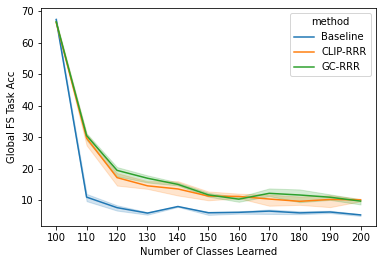

In [7]:
ax = sns.lineplot(x='Task', y='Global FS Task Acc', hue="method", data=data)
# ax.set_ylim((0, 100.0))
ax.set_xlabel("Number of Classes Learned")
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200])
# ax.set_xticks([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200])
plt.savefig('../figs/CL_exp.pdf', bbox_inches='tight')

In [39]:
entity, project = "lisadunlap", "rrr-metrics"  # set to your entity and project 
runs = api.runs(entity + "/" + project) 
summary_list, config_list, name_list, idx_list, best_list = [], [], [], [], []
all_keys = list(runs[-1].summary._json_dict.keys())
summary_dict = {k: [] for k in all_keys}
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    for k in run.summary._json_dict.keys():
        summary_dict[k].append(run.summary._json_dict[k])
    # .name is the human-readable name of the run.
    name_list.append(run.name)
target_len = 8
rem = []
for k in summary_dict:
    if len(summary_dict[k]) != target_len:
           rem.append(k)
for k in rem:
    del summary_dict[k]
           
print('--')
print(len(name_list))
runs_df = pd.DataFrame({
#     "Task": idx_list,
      "name": name_list,
      **summary_dict
    })

runs_df['method'] = runs_df['name'].apply(change_name)

--
8


In [42]:
selected_cols = [f"Gem btw Task {i}" for i in range(11)]
runs_df.groupby('name').mean()[selected_cols]
new_df = runs_df[["method"] + selected_cols]
new_df

,method,Gem btw Task 0,Gem btw Task 1,Gem btw Task 2,Gem btw Task 3,Gem btw Task 4,Gem btw Task 5,Gem btw Task 6,Gem btw Task 7,Gem btw Task 8,Gem btw Task 9,Gem btw Task 10
0,Baseline,-6.774876,-13.262332,-16.990555,-19.842904,-24.609570,-28.737087,-32.174587,-36.147651,-39.673075,-45.610575,-40.489279
1,CLIP-RRR,-6.651376,-9.626287,-11.507820,-12.950773,-15.517439,-16.893278,-18.282167,-20.302369,-22.031183,-24.496461,-17.078041
2,Baseline,-6.665490,-12.722838,-15.719354,-19.142173,-24.475506,-28.200338,-30.943394,-34.007367,-37.024316,-42.197927,-37.086609
3,CLIP-RRR,-6.594919,-9.677356,-11.454360,-12.930870,-15.530870,-17.175165,-18.633498,-20.485350,-22.010774,-24.614941,-17.396000
4,CLIP-RRR,-6.658433,-10.027609,-11.316808,-12.558418,-15.391752,-17.136718,-18.525607,-20.579479,-22.308293,-24.981904,-17.555197
5,GC-RRR,-6.693719,-10.206264,-11.565149,-13.209444,-16.009444,-17.318169,-18.602891,-20.185383,-21.812502,-24.138890,-17.361672
6,GC-RRR,-6.686662,-9.697415,-10.882084,-12.123694,-14.990361,-16.332643,-17.756254,-19.507096,-20.930825,-23.361380,-17.442402
7,GC-RRR,-6.609033,-9.798997,-11.610844,-13.154468,-15.787802,-17.398540,-18.926318,-20.811839,-22.608450,-25.212616,-16.940016


In [48]:
runs_df[['method'] + selected_cols]
# sns.barplot(x=selected_cols, y='best_val_acc', data=runs_df)
data = {'method': [], 'metric': [], "acc": []}
for i, row in runs_df[['method'] + selected_cols].iterrows():
    for s in selected_cols:
        data['method'].append(row['method'])
        data['metric'].append(s.replace('Gem ', ''))
        data['acc'].append(row[s])
        
matrics_df = pd.DataFrame(data)

<AxesSubplot:xlabel='metric', ylabel='acc'>

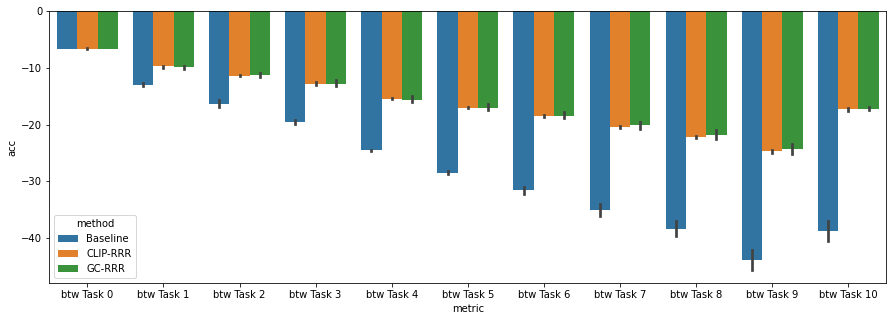

In [50]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5

sns.barplot(x='metric', y='acc', hue='method', data=matrics_df)